# Тема “Обучение без учителя”

### Задание 1

1. Импортируйте библиотеки pandas, numpy и matplotlib.
2. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
3. Создайте датафреймы X и y из этих данных.
4. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y = pd.DataFrame(boston['target'], columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

5. Масштабируйте данные с помощью StandardScaler.
6. Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
7. Постройте диаграмму рассеяния на этих данных.

In [49]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston['feature_names'])

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston['feature_names'])
X_train_scaled.shape, X_test_scaled.shape

((404, 13), (102, 13))

In [10]:
tsne = TSNE(n_components=2, learning_rate=240, random_state=42)

In [33]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_scaled.shape, X_train_tsne.shape

((404, 13), (404, 2))

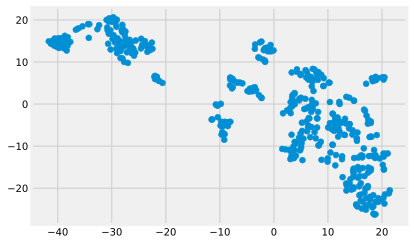

In [34]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train)
labels_train.shape

(404,)

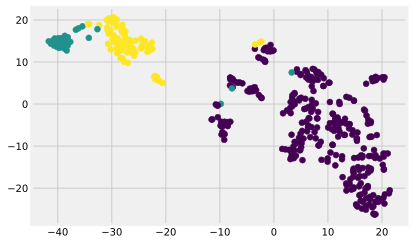

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [15]:
y_train.mean()

price    22.796535
dtype: float64

In [43]:
y_train[labels_train == 0].mean()

price    25.168687
dtype: float64

In [42]:
y_train[labels_train == 1].mean()

price    13.196774
dtype: float64

In [40]:
y_train[labels_train == 2].mean()

price    17.442105
dtype: float64

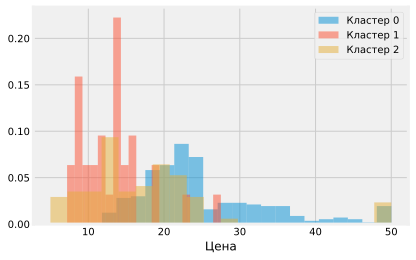

In [19]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()

In [20]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.40486282828282844
Кластер 1: 14.360380322580648
Кластер 2: 11.745661842105266


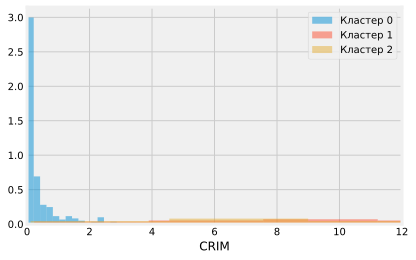

In [21]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')

plt.show()

## *Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [51]:
labels_test = kmeans.predict(X_test)
labels_test.shape

(102,)

In [52]:
y_test.mean()

price    21.488235
dtype: float64

In [57]:
y_test[labels_test == 0].mean()

price    23.911594
dtype: float64

In [58]:
y_test[labels_test == 1].mean()

price    12.814286
dtype: float64

In [59]:
y_test[labels_test == 2].mean()

price    17.392308
dtype: float64

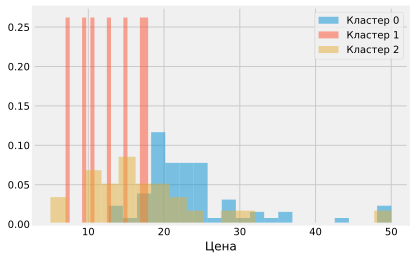

In [62]:
plt.hist(y_test[labels_test == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_test[labels_test == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_test[labels_test == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()

In [61]:
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0: 0.2464211594202899
Кластер 1: 19.021665714285714
Кластер 2: 8.469301923076923


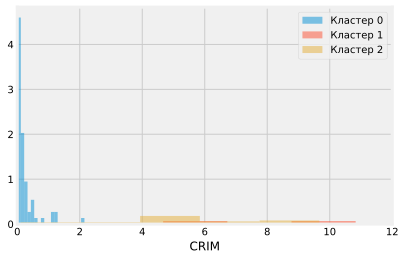

In [63]:
plt.hist(X_test.loc[labels_test == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_test.loc[labels_test == 1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_test.loc[labels_test == 2, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')

plt.show()